# The Z-Transform

Just as analog filters are designed using the Laplace transform, recursive digital filters are developed with a parallel technique called the z-transform. The overall strategy of these two transforms is the same: probe the impulse response with sinusoids and exponentials to find the system's poles and zeros. The Laplace transform deals with differential equations, the s-domain, and the s-plane. Correspondingly, the z-transform deals with difference equations, the z-domain, and the z-plane. However, the two techniques are not a mirror image of each other; the s-plane is arranged in a rectangular coordinate system, while the z-plane uses a polar format. 

The standard form of the z-transform is given by:
$$X(z) = \sum \limits^{\infty}_{n=-\infty} x[n]z^{-n} $$

where $z=re^{j\omega}$ and $r=e^{\sigma}$.

The utility to have the z-transform resides in the implementation of recursive filters, which uses *recursion coefficients*. To analyze these systems in the z-domain, we must be able to convert these recursion coefficients into the z-domain *transfer function*, and back again. Defining the z-transform in this manner ($r^n$ and $z$) provides the simplest means of moving between these two important representations. In fact, defining the z-domain in this way makes it trivial to move from one representation to the other.

## Stability and Relation with the Fourier Transform

In a continous system, if a pole occupies the right half of the s-plane (by the use of the Laplace transform) the system will be unstable. In the case of a discrete system, the system will be unstable if the poles are outside the unit circle in the z-plane. When the time domain signal is completly real, the upper and lower halves of the z-plane are mirror images of each other, just as with the s-domain.

A continous sinusoid can have any frequency between DC and infinity, a discrete sinusoid can only have a frequency between DC and one-half of the sampling rate. That is, frequency must be between 0 and 0.5, or between 0 and $\pi$ when expressed as a natural frequency.

The Laplace transform, evaluated at $\sigma = 0$, is equal to the Fourier transform. Evaluating the z-transform at $r=1$ is equal to the Discrete Time Fourier Transform (DTFT).

## Analysis of Recursive Systems

A recursive filter is described by a **difference equation**:

$$ y[n] = a_0 x[n] + a_1 x[n-1] + a_2 x[n-2] + a_3 x[n-3] + \cdot \cdot \cdot + b_1 y[n-1] + b_2 y[n-2] + b_3 y[n-3] + \cdot \cdot \cdot $$ <br>
where $x$ and $y$ are the input and output signals respectively, and $a$ and $b$ terms are the **recursion coefficients**.

Applying the z-transform to difference equation gives us:

$$ Y[z] = a_0 X(z) + a_1 X(z) z^{-1} + a_2 X(z) z^{-2} + a_3 X(z) z^{-3} + \cdot \cdot \cdot + b_1 Y(z)z^{-1} + b_2 Y(z)z^{-2} + b_3 Y(z)z^{-3} + \cdot \cdot \cdot $$


and the **system's transfer function** is:

$$H[z] = \frac{a_0 + a_1z^{-1} + a_2z^{-2} + a_3z^{-3} + \cdot \cdot \cdot}{1 - b_1z^{-1} - b_2z^{-2} - b_3z^{-3}} $$


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [2]:
def filter_frequency_response(a, b, w = np.arange(0, np.pi, 0.1)):
    """ 
    Function that generates the frequency response of a digital filter given the coeficients of 
    polynomials a0 + a_1*x + a_2*x^2 + ... and b0 + b_1*x + b_2*x^2 + ...
  
    Parameters: 
    w (numpy array): Array of natural frequency values.
    a (numpy array): Array of recursion coefficients a.
    b (numpy array): Array of recursion coefficients b.
  
    Returns: 
    numpy array: Returns filter response.
  
    """
    z = np.exp(1j*w)
    
    a_degree = np.arange(0,len(a))
    b_degree = np.arange(0,len(b))
    
    N = len(z)
    na = len(a_degree)
    nb = len(b_degree)
    
    ZA = (np.repeat(z,na, axis = 0)).reshape(N,na)
    ZB = (np.repeat(z,nb, axis = 0)).reshape(N,nb)
    
    z_a = np.dot((ZA**a_degree),a)
    z_b = np.dot((ZB**b_degree),b)
    return z_a/z_b


def idft(X):
    """ 
    Function that calculates the Complex IDFT
  
    Parameters: 
    X (numpy array): Array of numbers that represents the DFT of a signal.
  
    Returns: 
    numpy array: Returns IDFT of a given signal.
  
    """
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] = x[n] + X[k]*np.exp(1j*2*np.pi*k*n/N)
    return x


def zeros_poles_gain(a, b):
    """ 
    Function that calculates the zeros, poles and gain of a given transfer function which consists of
    the coeficients of polynomials a0 + a_1*x + a_2*x^2 + ... and b0 + b_1*x + b_2*x^2 + ...
  
    Parameters: 
    a (numpy array): Array of recursion coefficients a.
    b (numpy array): Array of recursion coefficients b.
  
    Returns: z,p,g
    z (numpy array): Zeros of transfer function.
    p (numpy array): Poles of transfer function.
    g (numpy array): Gain of transfer function.
  
    """
    return scipy.signal.tf2zpk(np.flip(a),np.flip(b))



def plot_zeros_poles(z, p):
    """ 
    Function that plots zeros and poles of transfer function
  
    Parameters: 
    z (numpy array): Array of zeros.
    p (numpy array): Array of poles.
  
    Returns: 
    Plot of zeros and poles of transfer function.
  
    """
    ax = plt.subplot(133)
    x = np.arange(-1,1,0.00001)
    y = np.zeros(len(x))
    ax.plot(x,np.sqrt(1-x**2),'black')
    ax.plot(x,-np.sqrt(1-x**2), 'black')
    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle = 'none', markersize=12)
    ax.plot(np.real(p), np.imag(p), 'rx', markersize=12)
    ax.grid(b=True, which = 'major')
    axis_x = np.arange(-1.5,1.5,0.00001)
    axis_y = np.zeros(len(axis_x))
    ax.plot(axis_x,axis_y, 'gray')
    ax.plot(axis_y,axis_x, 'gray')
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    plt.xlabel('Re')
    plt.ylabel('Im');

As an example suppose that a filter is given by:

$$H[z] = \frac{1.000 -1.414z + 1.000z^{2} }{0.810 -1.273z +1.000z^{2}} $$

In [8]:
a = np.array([1, -1.414, 1])
b = np.array([0.810, -1.273, 1])
w = np.arange(0, np.pi, 0.01)

H_w = filter_frequency_response(a,b,w)
impulse_response = idft(H_w)
z, p, g = zeros_poles_gain(a, b)

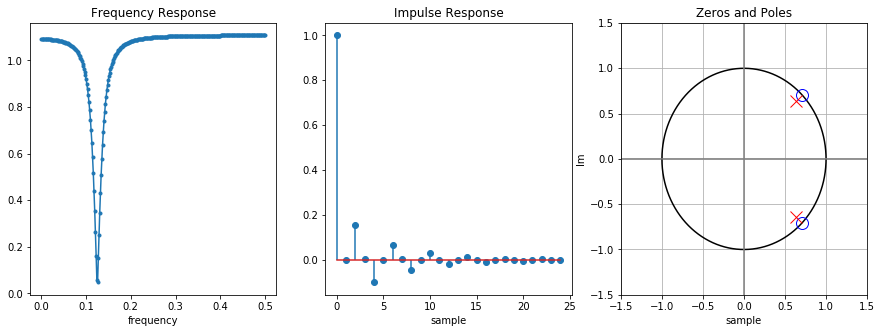

In [9]:
plt.rcParams["figure.figsize"] = (15,5)

plt.subplot(1, 3, 1)
plt.plot(w/(2*max(w)), np.absolute(H_w), '.-')
plt.title('Frequency Response')
plt.xlabel('frequency')

plt.subplot(1, 3, 2)
plt.stem(impulse_response[0:25]/np.max(impulse_response), use_line_collection=True)
plt.title('Impulse Response')
plt.xlabel('sample')

plot_zeros_poles(z, p)
plt.title('Zeros and Poles')
plt.xlabel('sample');

### Reading material
[1] https://dsp.stackexchange.com/questions/41642/filter-design-with-zero-pole-placement-method